# Project - Glass Classification

### After using the ML classifiers, now we are going to build a Keras Sequential model to check whether it perfroms better than the Random Forest Classifier. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r'D:\New folder\Glass Classification\Dataset\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Data Pre-processing

In [3]:
X_train = df.drop('Type', axis = 1)
y_train = df['Type']

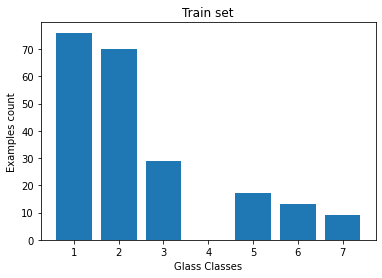

In [4]:
glass_classes = y_train.unique()
values = y_train.value_counts()

plt.bar(glass_classes, values)
plt.title('Train set')
plt.xlabel('Glass Classes')
plt.ylabel('Examples count')
plt.show()

In [5]:
X_train = df.values
X_train = normalize(X_train)
print(X_train[0])

[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


In [6]:
y_train = to_categorical(y_train)
y_train.shape

(214, 8)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

### Building the Keras model

In [8]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
            
    tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['acc'])

model

In [9]:
y_train.shape

(171, 8)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [11]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=6,
                    validation_data=(X_val, y_val),
                    verbose=1,
                   )

Epoch 1/60
29/29 [==============================] - 3s 22ms/step - loss: 2.8103 - acc: 0.1930 - val_loss: 2.0798 - val_acc: 0.0000e+00
Epoch 2/60
29/29 [==============================] - 0s 13ms/step - loss: 2.4878 - acc: 0.3158 - val_loss: 2.1012 - val_acc: 0.0000e+00
Epoch 3/60
29/29 [==============================] - 0s 8ms/step - loss: 2.1863 - acc: 0.3977 - val_loss: 2.1282 - val_acc: 0.0000e+00
Epoch 4/60
29/29 [==============================] - 0s 8ms/step - loss: 1.8931 - acc: 0.4152 - val_loss: 2.1465 - val_acc: 0.0000e+00
Epoch 5/60
29/29 [==============================] - 0s 13ms/step - loss: 1.9647 - acc: 0.4094 - val_loss: 2.1597 - val_acc: 0.0000e+00
Epoch 6/60
29/29 [==============================] - 0s 7ms/step - loss: 1.7565 - acc: 0.4444 - val_loss: 2.1839 - val_acc: 0.0000e+00
Epoch 7/60
29/29 [==============================] - 0s 13ms/step - loss: 1.7442 - acc: 0.4795 - val_loss: 2.2073 - val_acc: 0.0000e+00
Epoch 8/60
29/29 [==============================] - 0s 8ms

#### Plotting the model accuracy

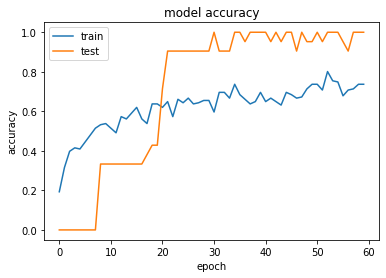

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model evaluation

In [13]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 0.5894 - acc: 0.9091


[0.5893828868865967, 0.9090909361839294]

In [14]:
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)

array([[6, 0, 0, 0, 0, 0],
       [0, 6, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 4]], dtype=int64)

### Therefore, we can conclude that the Keras Sequential model has performed even better than the Random Forest Classifier model with a validation accuracy of 95.24% and a testing accuracy of 90.91%. Now we will save this model

In [16]:
model.save(r'D:\New folder\Glass Classification\Model\Keras model')

INFO:tensorflow:Assets written to: D:\New folder\Glass Classification\Model\Keras model\assets
